In [1]:
from fastdtw import fastdtw
from keras.layers import LSTM
from keras.models import Sequential, load_model

from timeseries_ml_utils.data import *
from timeseries_ml_utils.statistics import *
from timeseries_ml_utils.encoders import *
from random import randint

import matplotlib.pyplot as plt

# encoders and decoders
linreg = RegressionLine(16)

# fetch data
data = DataFetcher(["GLD.US"], limit=350)
data.fetch_data().tail()

print(len(data.get_dataframe()))
model_data = DataGenerator(data.get_dataframe(), 
                           {"^trigonometric": identity, 
                            "(Open|High|Low|Close)$": linreg.encode_decode}, 
                           {"GLD.US.Close$": linreg.encode_decode},
                           aggregation_window_size=16, batch_size=10, model_filename="/tmp/keras-foo-2.h5")

print(model_data.batch_feature_shape)
print(model_data.batch_label_shape)
model_data.features, model_data.labels

model = Sequential(name="LSTM-Model-1")
model.add(LSTM(model_data.batch_label_shape[-1],
               name="LSTM-Layer-1",
               batch_input_shape=model_data.batch_feature_shape,
               activation='tanh',
               dropout=0,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=model_data.return_sequences))

model.compile("Adam", loss="mse", metrics=['mae', 'acc'])

train_args = {"epochs": 1,
              "use_multiprocessing": True,
              "workers": 4,
              "shuffle": False,
              "verbose": 1}

model_data.fit(model, train_args, frequency=10, relative_accuracy_function=r_square, log_dir="/tmp/foo.123/")


predictor = model_data.as_predictive_data_generator()

Using TensorFlow backend.


350


(10, 260, 224)
(10, 16)


Epoch 1/1


 1/41 [..............................] - ETA: 2:16 - loss: 0.0911 - mean_absolute_error: 0.2544 - acc: 0.0000e+00

 2/41 [>.............................] - ETA: 1:09 - loss: 0.0776 - mean_absolute_error: 0.2323 - acc: 0.0000e+00

 3/41 [=>............................] - ETA: 47s - loss: 0.0668 - mean_absolute_error: 0.2087 - acc: 0.0000e+00 

 4/41 [=>............................] - ETA: 36s - loss: 0.0587 - mean_absolute_error: 0.1898 - acc: 0.0000e+00

 5/41 [==>...........................] - ETA: 36s - loss: 0.0514 - mean_absolute_error: 0.1732 - acc: 0.0000e+00

 6/41 [===>..........................] - ETA: 30s - loss: 0.0465 - mean_absolute_error: 0.1614 - acc: 0.0000e+00

 7/41 [====>.........................] - ETA: 26s - loss: 0.0426 - mean_absolute_error: 0.1518 - acc: 0.0000e+00

 8/41 [====>.........................] - ETA: 23s - loss: 0.0392 - mean_absolute_error: 0.1433 - acc: 0.0000e+00

 9/41 [=====>........................] - ETA: 25s - loss: 0.0362 - mean_absolute_error: 0.1358 - acc: 0.0000e+00

10/41 [======>.......................] - ETA: 22s - loss: 0.0336 - mean_absolute_error: 0.1291 - acc: 0.0000e+00

11/41 [=======>......................] - ETA: 20s - loss: 0.0312 - mean_absolute_error: 0.1228 - acc: 0.0000e+00


 [-1.43632433e+04 -1.29275847e+04 -1.14919262e+04 -1.00562676e+04
 -8.62060905e+03 -7.18495049e+03 -5.74929193e+03 -4.31363337e+03
 -2.87797481e+03 -1.44231626e+03 -6.65769910e+00] 

12/41 [=======>......................] - ETA: 23s - loss: 0.0290 - mean_absolute_error: 0.1166 - acc: 0.0083    

13/41 [========>.....................] - ETA: 21s - loss: 0.0272 - mean_absolute_error: 0.1114 - acc: 0.0154

14/41 [=========>....................] - ETA: 19s - loss: 0.0256 - mean_absolute_error: 0.1068 - acc: 0.0143

15/41 [=========>....................] - ETA: 17s - loss: 0.0241 - mean_absolute_error: 0.1022 - acc: 0.0333

16/41 [==========>...................] - ETA: 16s - loss: 0.0227 - mean_absolute_error: 0.0978 - acc: 0.0563

17/41 [===========>..................] - ETA: 14s - loss: 0.0216 - mean_absolute_error: 0.0940 - acc: 0.0824

18/41 [============>.................] - ETA: 13s - loss: 0.0206 - mean_absolute_error: 0.0908 - acc: 0.0944

19/41 [============>.................] - ETA: 12s - loss: 0.0197 - mean_absolute_error: 0.0879 - acc: 0.1105

20/41 [=============>................] - ETA: 11s - loss: 0.0189 - mean_absolute_error: 0.0853 - acc: 0.1250

21/41 [==============>...............] - ETA: 11s - loss: 0.0181 - mean_absolute_error: 0.0827 - acc: 0.1381


 [-5.10968096e+03 -4.59903110e+03 -4.08838125e+03 -3.57773139e+03
 -3.06708153e+03 -2.55643168e+03 -2.04578182e+03 -1.53513196e+03
 -1.02448211e+03 -5.13832250e+02 -3.18239305e+00] 

22/41 [===============>..............] - ETA: 11s - loss: 0.0174 - mean_absolute_error: 0.0805 - acc: 0.1409

23/41 [===============>..............] - ETA: 10s - loss: 0.0168 - mean_absolute_error: 0.0785 - acc: 0.1391

24/41 [================>.............] - ETA: 9s - loss: 0.0163 - mean_absolute_error: 0.0768 - acc: 0.1333 

25/41 [=================>............] - ETA: 9s - loss: 0.0158 - mean_absolute_error: 0.0751 - acc: 0.1360

26/41 [==================>...........] - ETA: 8s - loss: 0.0153 - mean_absolute_error: 0.0735 - acc: 0.1462

27/41 [==================>...........] - ETA: 7s - loss: 0.0148 - mean_absolute_error: 0.0719 - acc: 0.1593

28/41 [===================>..........] - ETA: 6s - loss: 0.0144 - mean_absolute_error: 0.0703 - acc: 0.1750

29/41 [====================>.........] - ETA: 6s - loss: 0.0140 - mean_absolute_error: 0.0688 - acc: 0.1966

30/41 [====================>.........] - ETA: 5s - loss: 0.0136 - mean_absolute_error: 0.0674 - acc: 0.2200

31/41 [=====================>........] - ETA: 5s - loss: 0.0132 - mean_absolute_error: 0.0661 - acc: 0.2452


 [-2431.86851308 -2188.98545718 -1946.10240127 -1703.21934536
 -1460.33628945 -1217.45323354  -974.57017763  -731.68712173
  -488.80406582  -245.92100991    -3.037954  ] 

32/41 [======================>.......] - ETA: 5s - loss: 0.0128 - mean_absolute_error: 0.0648 - acc: 0.2656

33/41 [=======================>......] - ETA: 4s - loss: 0.0125 - mean_absolute_error: 0.0635 - acc: 0.2788

34/41 [=======================>......] - ETA: 3s - loss: 0.0122 - mean_absolute_error: 0.0624 - acc: 0.2912

35/41 [========================>.....] - ETA: 3s - loss: 0.0119 - mean_absolute_error: 0.0613 - acc: 0.2971

36/41 [=========================>....] - ETA: 2s - loss: 0.0116 - mean_absolute_error: 0.0604 - acc: 0.3000

37/41 [==========================>...] - ETA: 2s - loss: 0.0114 - mean_absolute_error: 0.0595 - acc: 0.3000

38/41 [==========================>...] - ETA: 1s - loss: 0.0112 - mean_absolute_error: 0.0587 - acc: 0.2974

39/41 [===========================>..] - ETA: 1s - loss: 0.0110 - mean_absolute_error: 0.0579 - acc: 0.2949

40/41 [============================>.] - ETA: 0s - loss: 0.0108 - mean_absolute_error: 0.0571 - acc: 0.2900


 [-9.20499938e+02 -8.28513334e+02 -7.36526729e+02 -6.44540125e+02
 -5.52553521e+02 -4.60566916e+02 -3.68580312e+02 -2.76593707e+02
 -1.84607103e+02 -9.26204987e+01 -6.33894348e-01] 



41/41 [==============================] - 23s 572ms/step - loss: 0.0106 - mean_absolute_error: 0.0563 - acc: 0.2829 - val_loss: 0.0024 - val_mean_absolute_error: 0.0284 - val_acc: 0.0000e+00



 [-9.20499938e+02 -8.28513334e+02 -7.36526729e+02 -6.44540125e+02
 -5.52553521e+02 -4.60566916e+02 -3.68580312e+02 -2.76593707e+02
 -1.84607103e+02 -9.26204987e+01 -6.33894348e-01] 



In [2]:
predicted, labels, r_squares, stds = predictor.back_test(model.predict)



32


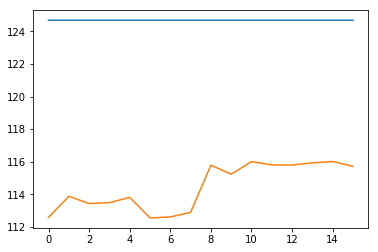

In [12]:
i = randint(0, len(predicted[0]))
print(i)
plt.plot(predicted[0][i])
plt.plot(labels[0][i])

            GLD.US.Close predicted  GLD.US.Close
2018-09-27                     NaN        112.05
2018-09-28                     NaN        112.76
2018-10-01                     NaN        112.57
2018-10-02                     NaN        113.87
2018-10-03                     NaN        113.42
2018-10-04                     NaN        113.48
2018-10-05                     NaN        113.80
2018-10-08                     NaN        112.54
2018-10-09                     NaN        112.60
2018-10-10                     NaN        112.88
2018-10-11                     NaN        115.78
2018-10-12                     NaN        115.23
2018-10-15                     NaN        116.00
2018-10-16                     NaN        115.80
2018-10-17                     NaN        115.79
2018-10-18                     NaN        115.92
2018-10-19              115.920000        116.01
2018-10-22              115.999427        115.71
2018-10-23              116.078855        116.39
2018-10-24          

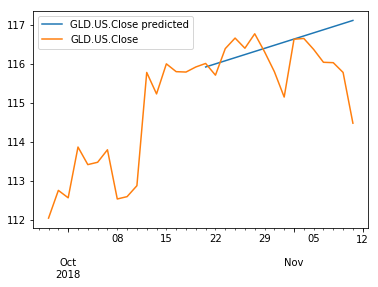

In [11]:
prediction = predictor.predict(-30)
print(prediction)
prediction.plot()

In [1]:
from timeseries_ml_utils.encoders import *
linreg = RegressionLine(12)
